In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
def extract_image(path):
    image = Image.open(path, 'r').convert('RGB')
    image = image.resize((200 ,200))
    
    w, h = image.size
    
    image_matrix = list(image.getdata())
    
    image_matrix = np.array(image_matrix).reshape((w, h, 3))
    
    return image_matrix/255

In [5]:
import os

image_array = []
label_array = []

classes_of_diseases = {'Nematodes':0, "Normal":1, "Bacteria":2, "Fungi":3, "Virus":4}
for dirpath, dirnames, filenames in os.walk(r"./Datasets/"):
    for file in filenames:
        path = str(os.path.join(dirpath, file))
        image = extract_image(path)
        l = path.split('/')
        
        image_array.append(image)
        label_array.append(classes_of_diseases[str(l[2])])

In [6]:
X = np.array(image_array, dtype='float32')
y = np.array(label_array)

In [17]:
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import Sequential
import tensorflow as tf

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = Sequential()
model.add(Conv2D(256, 2, 2, input_shape=X[0].shape))
model.add(Conv2D(128, 2, 2))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

2024-03-11 22:32:06.387502: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-11 22:32:06.387520: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-11 22:32:06.387526: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-11 22:32:06.387588: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-11 22:32:06.387617: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 256)     3328      
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 128)       131200    
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 128)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 80000)             0         
                                                                 
 dense (Dense)               (None, 256)               20480256  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

Epoch 1/50
39/39 [==============================] - 2s 36ms/step - loss: 166516.0469 - accuracy: 0.6632 - val_loss: 292595.1250 - val_accuracy: 0.3636
Epoch 2/50
39/39 [==============================] - 1s 35ms/step - loss: 241660.8125 - accuracy: 0.6166 - val_loss: 205792.2031 - val_accuracy: 0.6818
Epoch 3/50
39/39 [==============================] - 1s 32ms/step - loss: 120516.3281 - accuracy: 0.7098 - val_loss: 205874.4531 - val_accuracy: 0.6818
Epoch 4/50
39/39 [==============================] - 1s 34ms/step - loss: 100591.9609 - accuracy: 0.7720 - val_loss: 314239.3750 - val_accuracy: 0.5909
Epoch 5/50
39/39 [==============================] - 1s 34ms/step - loss: 108128.8672 - accuracy: 0.7979 - val_loss: 170856.9688 - val_accuracy: 0.6818
Epoch 6/50
39/39 [==============================] - 1s 36ms/step - loss: 120181.9062 - accuracy: 0.8187 - val_loss: 280106.8750 - val_accuracy: 0.5000
Epoch 7/50
39/39 [==============================] - 1s 32ms/step - loss: 79968.8828 - accuracy

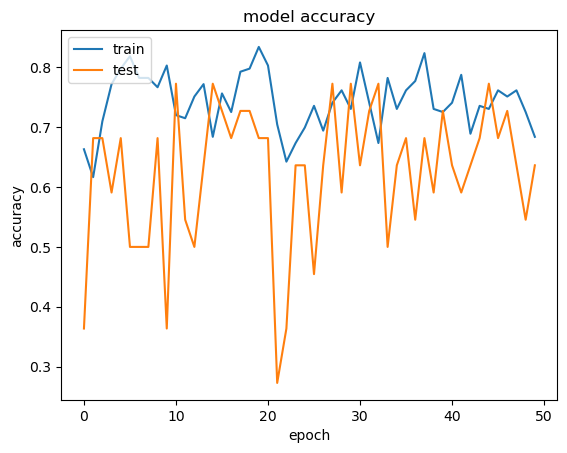

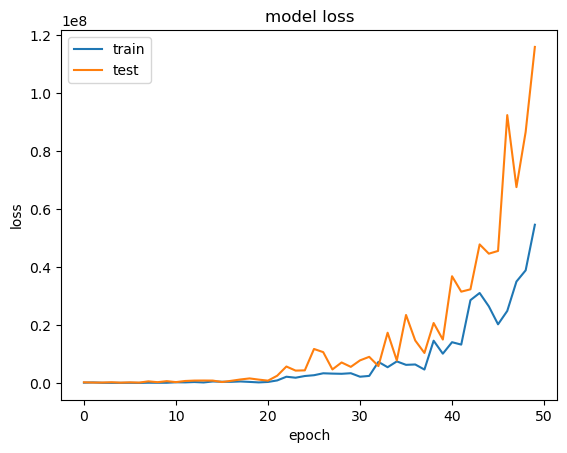

1/1 [==============================] - 0s 107ms/step - loss: 114818048.0000 - accuracy: 0.5833


[114818048.0, 0.5833333134651184]

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.evaluate(X_test, y_test)

In [15]:
model.save("./prediction_model")

INFO:tensorflow:Assets written to: ./prediction_model/assets


INFO:tensorflow:Assets written to: ./prediction_model/assets


In [18]:
new_model = tf.keras.models.load_model('./prediction_model')

In [20]:
def predict_disease(path, model):
    img = Image.open(path, 'r').convert("RGB")
    img = img.resize((200, 200))
    w, h = img.size
    image = list(img.getdata())
    mat = np.array(image).reshape((w, h, 3))
    mat = mat/255.0
    l = [mat]
    mat = np.array(l, dtype='float32')
    ans = model.predict(mat)
    
    key_list = list(classes_of_diseases.keys())
    val_list = list(classes_of_diseases.values())
    
    for i in range(0, 5):
        if(ans[0][i] == 1):
            position = val_list.index(i)
            return key_list[position]

In [21]:
predict_disease(r"./color_segmentation.png", new_model)

1/1 [==============================] - 0s 114ms/step


2024-03-11 22:45:35.516234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


'Nematodes'